In [6]:
%matplotlib inline


In [7]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.integrate import ode

In [8]:
def brusselator(t, u, a, b):
    x = u[0]
    y = u[1]
    dxdt = 1 - (b+1)*x + a*x*x*y
    dydt = b*x - a*x*x*y
    return np.array([dxdt,dydt])

In [9]:
x0,y0 = 0,0
tmax = 300
deltat = 0.1
a = 1

In [10]:
def simbrusselator(b):
    r = ode(brusselator)
    r.set_initial_value(np.array([x0,y0])).set_f_params(a,b)
    Ylist = [r.y]
    Tlist = [r.t]
    while r.successful() and r.t<tmax:
        Ylist.append(r.integrate(r.t+deltat))
        Tlist.append(r.t)
    Y = np.array(Ylist)
    T = np.array(Tlist)

    return T, Y

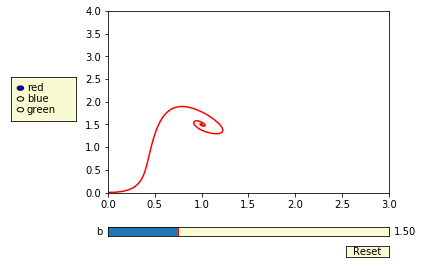

In [18]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
b0 = 1.5
delta_b = 0.01


T, Y = simbrusselator(b0)

l, = plt.plot(Y[:,0], Y[:,1])
ax.set_xlim(0,3)
ax.set_ylim(0,4)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axb = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
#axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sliderb = Slider(axb, 'b', 1, 3, valinit=b0, valstep=delta_b)
#samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    b = sliderb.val
    T, Y = simbrusselator(b)
    l.set_xdata(Y[:,0])
    l.set_ydata(Y[:,1])
    fig.canvas.draw_idle()


sliderb.on_changed(update)
#samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sliderb.reset()
    #samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

# Initialize plot with correct initial active value
colorfunc(radio.value_selected)

plt.show()